In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
%matplotlib inline


In [5]:
tizibika= pd.read_csv('tizibika_dataset.csv')

In [6]:
tizibika.head()

,Unnamed: 0,likes,replies,retweets,text,timestamp,user
0,0,14,0,5,#tizibika I'm in love \nZambian productions re...,2018-02-14 22:41:18,Talu_starzz
1,1,2,1,0,We going places. #Tizibika #eddieTheRapper,2018-02-14 5:56:20,wrsikabuli
2,2,6,0,2,...S/O to @arushapot for directing #Tizibika !...,2018-02-13 22:27:26,kryticismusic
3,3,1,0,0,#Tizibika something giving me another reason t...,2018-02-13 20:28:19,khristine_phiri
4,4,0,1,0,Just watching The First Episode Of #Tizibika,2018-02-13 20:23:54,TongaPrince


In [6]:
tizibika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
Unnamed: 0    233 non-null int64
likes         233 non-null int64
replies       233 non-null int64
retweets      233 non-null int64
text          233 non-null object
timestamp     233 non-null object
user          233 non-null object
dtypes: int64(4), object(3)
memory usage: 12.8+ KB


In [7]:
tizibika['time_date']=pd.to_datetime(tizibika['timestamp'])

In [8]:
tizibika['date'] = [d.date() for d in tizibika['time_date']]
tizibika['time'] = [d.time() for d in tizibika['time_date']]
tizibika['hour']= tizibika.time_date.dt.hour



In [10]:
tizibika.head()

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
0,0,14,0,5,#tizibika I'm in love \nZambian productions re...,2018-02-14 22:41:18,Talu_starzz,2018-02-14 22:41:18,2018-02-14,22:41:18,22
1,1,2,1,0,We going places. #Tizibika #eddieTheRapper,2018-02-14 5:56:20,wrsikabuli,2018-02-14 05:56:20,2018-02-14,05:56:20,5
2,2,6,0,2,...S/O to @arushapot for directing #Tizibika !...,2018-02-13 22:27:26,kryticismusic,2018-02-13 22:27:26,2018-02-13,22:27:26,22
3,3,1,0,0,#Tizibika something giving me another reason t...,2018-02-13 20:28:19,khristine_phiri,2018-02-13 20:28:19,2018-02-13,20:28:19,20
4,4,0,1,0,Just watching The First Episode Of #Tizibika,2018-02-13 20:23:54,TongaPrince,2018-02-13 20:23:54,2018-02-13,20:23:54,20


In [11]:
date_tweet_count=tizibika['date'].value_counts()

In [12]:
def convert_index_column(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,date_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['date'][index]
        tweets_per_day={'date':date_from_index,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_day)
    return tweets_list
        
        

In [14]:
df_tweet_date_count=pd.DataFrame(data=date_tweet_count)
tweets_per_day=convert_index_column(df_tweet_date_count)
tweets_per_day_df=pd.DataFrame(tweets_per_day)
tweets_per_day_df

,date,number_of_tweets
0,2018-02-08,60
1,2018-02-09,44
2,2018-02-16,30
3,2018-02-15,20
4,2018-02-10,12
5,2018-01-21,11
6,2018-02-17,10
7,2018-02-13,9
8,2018-02-18,9
9,2018-01-20,5


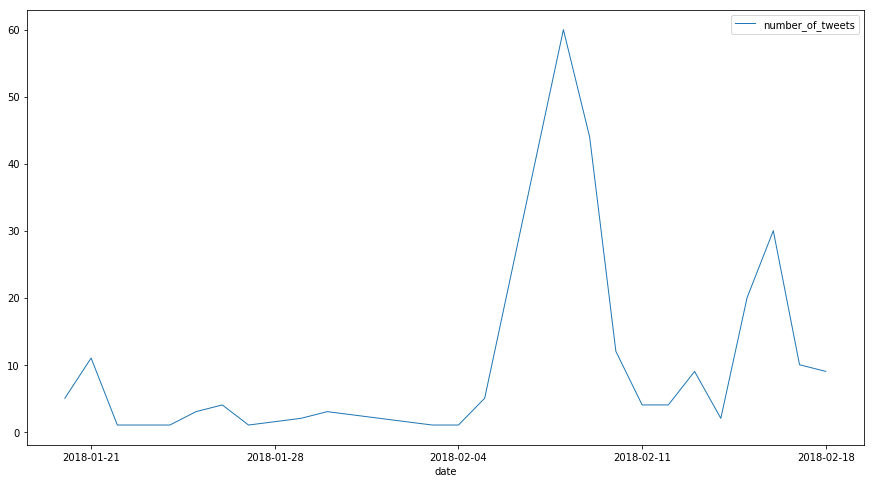

In [15]:
tweets_per_day_df.plot.line(x=tweets_per_day_df['date'],y='number_of_tweets',figsize=(15,8),lw=1)

In [22]:
hour_tweet_count=tizibika['hour'].value_counts()
df_tweet_hour_count=pd.DataFrame(data=hour_tweet_count)
df_tweet_hour_count

,hour
20,68
19,44
21,35
10,11
11,11
22,8
17,7
12,6
4,6
13,5


In [23]:
def convert_index_hour(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,hour_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['hour'][hour_from_index]
        hour=str(hour_from_index)+"hrs"
        tweets_per_hour={'hour':hour,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_hour)
    return tweets_list

In [19]:
tweets_per_hour=convert_index_hour(df_tweet_hour_count)
tweets_per_hour_df=pd.DataFrame(tweets_per_hour)
tweets_per_hour_df

,hour,number_of_tweets
0,20hrs,68
1,19hrs,44
2,21hrs,35
3,10hrs,11
4,11hrs,11
5,22hrs,8
6,17hrs,7
7,12hrs,6
8,4hrs,6
9,13hrs,5


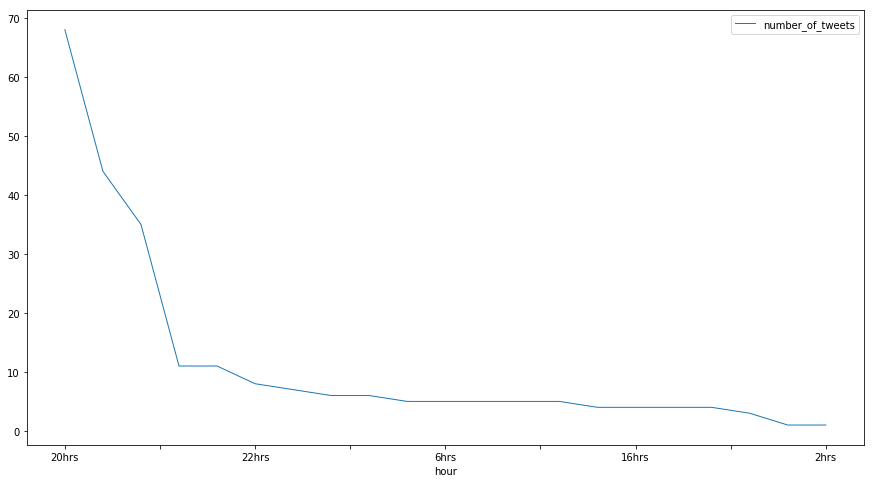

In [20]:
tweets_per_hour_df.plot.line(x='hour',y='number_of_tweets',figsize=(15,8),lw=1)

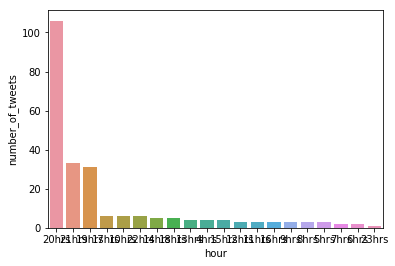

In [494]:
sns.barplot(x='hour',y='number_of_tweets',data=tweets_per_hour_df)

In [24]:
tizibika[tizibika['retweets']==tizibika['retweets'].max()]

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
140,140,123,2,24,"Everyone who watched, twitted thank you soo mu...",2018-02-08 20:59:34,tozy_b,2018-02-08 20:59:34,2018-02-08,20:59:34,20
152,152,75,3,24,Of all of this weeks new shows on Channel 160 ...,2018-02-08 20:47:27,luchi7,2018-02-08 20:47:27,2018-02-08,20:47:27,20


In [25]:
highly_retweeted=tizibika[tizibika['retweets']==tizibika['retweets'].max()]

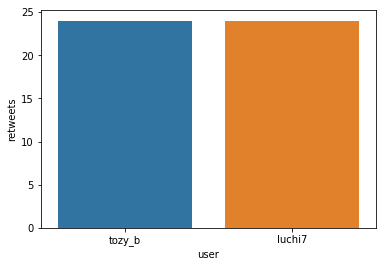

In [26]:
sns.barplot(x='user',y='retweets',data=highly_retweeted)

In [27]:
tizibika[tizibika['likes']==tizibika['likes'].max()]

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
140,140,123,2,24,"Everyone who watched, twitted thank you soo mu...",2018-02-08 20:59:34,tozy_b,2018-02-08 20:59:34,2018-02-08,20:59:34,20


In [28]:
tweep_group=tizibika.groupby('user')
tweep_most_likes=tweep_group['likes'].sum()
tweep_most_likes_df_temp=pd.DataFrame(tweep_most_likes)
tweep_most_likes_df=pd.DataFrame(tweep_most_likes_df_temp['likes'])


In [29]:
def convert_index_most_liked(tweep_most_likes_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_likes=tweep_most_likes_df['likes'][index]
        likes_per_user={'user':user_from_index,'number_of_likes':total_likes}
        tweeps.append(likes_per_user)
    return tweeps
        
        

In [30]:
temp=convert_index_most_liked(tweep_most_likes_df)
most_likes_df=pd.DataFrame(temp)
most_liked_tweets=most_likes_df.sort_values(by='number_of_likes')
most_liked_tweets.tail(5)



,number_of_likes,user
110,52,kathlyn_47
117,79,luchi7
94,162,arushapot
103,162,iistargirl
134,179,tozy_b


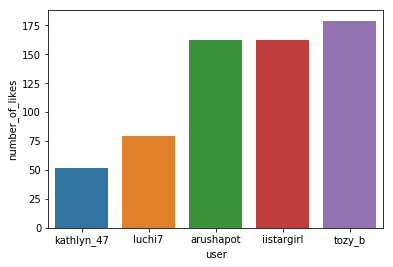

In [31]:
sns.barplot(x='user',y='number_of_likes',data=most_liked_tweets.tail(5))

In [32]:
most_retweeted_tweeps_sum=tizibika.groupby('user')['retweets'].sum()

In [33]:
temp=pd.DataFrame(most_retweeted_tweeps_sum)

In [34]:
def convert_index_most_retweeted(tweep_most_retweeted_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_retweets=tweep_most_retweeted_df['retweets'][index]
        retweets_per_user={'user':user_from_index,'number_of_retweets':total_retweets}
        tweeps.append(retweets_per_user)
    return pd.DataFrame(tweeps)

In [35]:
most_retweeted_tweeps_df=convert_index_most_retweeted(temp)


In [36]:
most_retweeted_tweeps_sorted=most_retweeted_tweeps_df.sort_values(by='number_of_retweets')
most_retweeted_tweeps_sorted.tail(5)

,number_of_retweets,user
117,25,luchi7
90,30,ZambiazHarshTag
103,42,iistargirl
134,50,tozy_b
94,53,arushapot


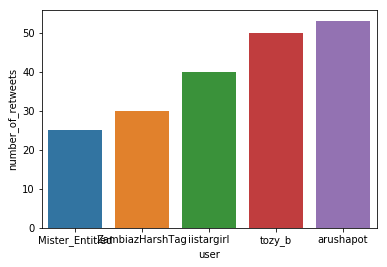

In [490]:
sns.barplot(x='user',y='number_of_retweets',data=most_retweeted_tweeps_sorted.tail(5))

Let begin to find out what words are used to describe Tizibika

In [66]:
import nltk
from nltk.corpus import stopwords
import  string

In [64]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation] 
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [70]:
def count_description(df):
    words=[]
    words.append(text_process(text) for text in df['text'] )
    return  words
  

In [71]:
count_description(tizibika)

[<generator object count_description.<locals>.<genexpr> at 0x7f0d93516af0>]